# Project on Taxi Fare Prediction-(Random Forest)
## Project Abstract:
### In the last few years, the number of for-hire vehicles operating in NY has grown from 63,000 to more than 100,000. However, while the number of trips in app-based vehicles has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million to 8.5 million. Hence, the NY Yellow Cab organization decided to become more data centric. Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? After all, that set price is not a random guess.
## Problem Statement:
### Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest.

## Dataset Information:
### Each attribute in the dataset is a important factor.
### Column Description:
#### unique_id: A unique identifier or key for each record in the dataset
#### date_time_of_pickup: The time when the ride started
#### longitude_of_pickup: Longitude of the taxi ride pickup point
#### latitude_of_pickup: Latitude of the taxi ride pickup point
#### longitude__of_dropoff: Longitude of the taxi ride dropoff point
#### latitude_of_dropoff: Latitude of the taxi ride dropoff point
#### no_of_passenger: count of the passengers during the ride
#### amount: (target variable)dollar amount of the cost of the taxi ride

### 1. Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
%matplotlib inline

### 2. Importing Data:

In [2]:
df=pd.read_csv('TaxiFare.csv')

### 3. EDA:

In [3]:
pd. get_option("display.max_columns")

20

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [10]:
# Creating a distance column as dist after calculating the distance using latitude and longitude
df["dist"]=abs(df.longitude_of_pickup-df.longitude_of_dropoff)+abs(df.latitude_of_pickup-df.latitude_of_dropoff)
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194
...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508


In [11]:
# Checking for missing values in the dataframe
df.isnull().sum() # No missing values are present in the Dataframe

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dist                    0
dtype: int64

<AxesSubplot:>

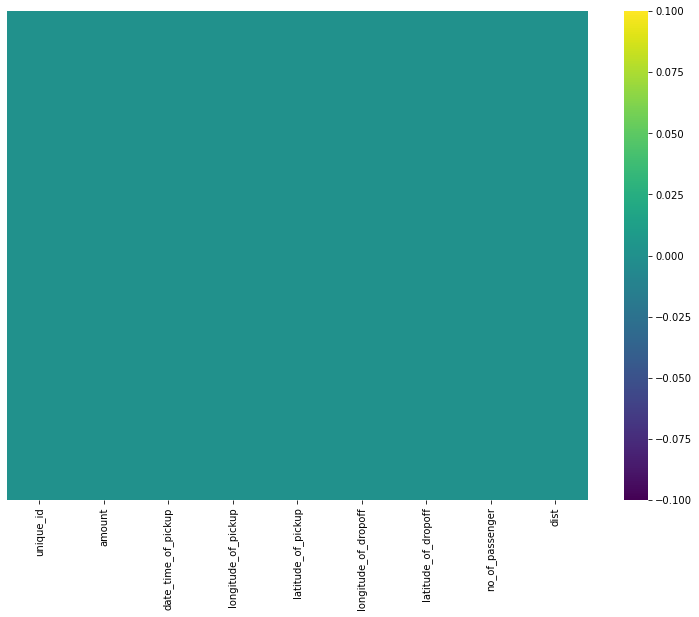

In [12]:
# Checking Visually for missing values
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

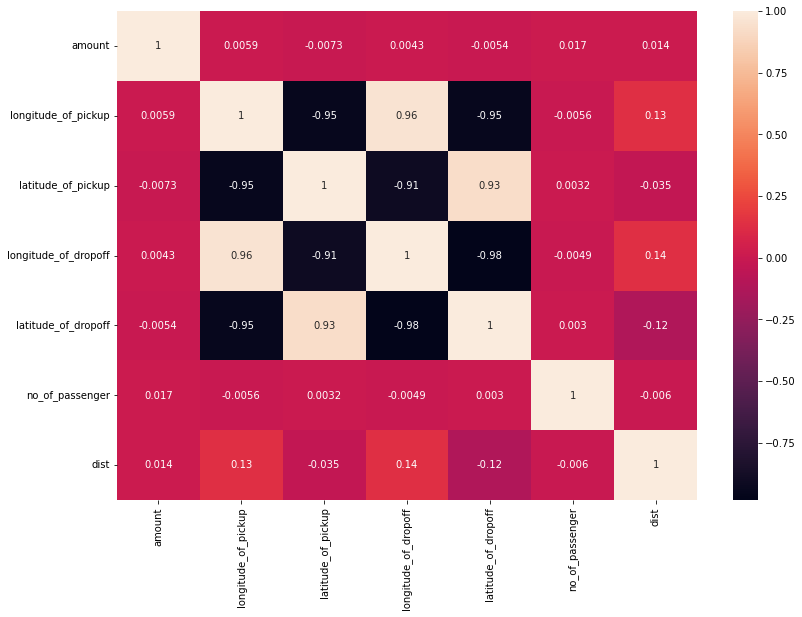

In [13]:
# Getting the correlation of the dataframe visually
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.date_time_of_pickup

0        2009-06-15 17:26:21 UTC
1        2010-01-05 16:52:16 UTC
2        2011-08-18 00:35:00 UTC
3        2012-04-21 04:30:42 UTC
4        2010-03-09 07:51:00 UTC
                  ...           
49995    2013-06-12 23:25:15 UTC
49996    2015-06-22 17:19:18 UTC
49997    2011-01-30 04:53:00 UTC
49998    2012-11-06 07:09:00 UTC
49999    2010-01-13 08:13:14 UTC
Name: date_time_of_pickup, Length: 50000, dtype: object

In [15]:
# Including day in the dataframe
day=[]
for i in df.date_time_of_pickup:
    day.append(pd.Timestamp((i.split()[0])+" "+(i.split()[1])).day_name())
df["Day"]=day

for i in df.date_time_of_pickup:
    print(pd.Timestamp((i.split()[0])+" "+(i.split()[1])).day_name())

In [16]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday
...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday


In [17]:
# Including the date in the dataframe
day=[]
for i in df.date_time_of_pickup:
    l=i.split()[0].split("-")[2]
    day.append(int(l))
df["day_num"]=day
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9
...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday,6


In [18]:
# Including the time of day in the dataframe
timeofday=[]
for i in df.date_time_of_pickup:
    l=int(i.split()[1].split(":")[0])
    timeofday.append(l)
df['Session']=timeofday
df['Session'] = (df['Session'] + 4) // 4
df['Session'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [19]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday,6,Early Morning


In [20]:
# Dropping unwanted columns based on the problem statement and previously converted ones
df.drop(["date_time_of_pickup","unique_id"],axis=1,inplace=True)

In [21]:
# Dropping rows with amount value lesser than 0
df=df.drop(df[df.amount<=0].index)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday,6,Early Morning


In [22]:
# Dropping rows with values distance as dist equal to 0
df=df.drop(df[df.dist==0].index)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,0.025552,Saturday,13,Evening
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning


In [23]:
# Dropping rows with number of passengers equal to 0
df=df.drop(df[df.no_of_passenger==0].index)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,0.025552,Saturday,13,Evening
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning


In [24]:
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,0.025552,Saturday,13,Evening
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning


In [25]:
# Dropping rows that are used to create distance as dist
df.drop(["longitude_of_pickup","longitude_of_dropoff","latitude_of_pickup","latitude_of_dropoff"], axis=1,inplace=True)
df

,amount,no_of_passenger,dist,Day,day_num,Session
0,4.5,1,0.011742,Monday,15,Evening
1,16.9,1,0.107481,Tuesday,5,Evening
2,5.7,2,0.019212,Thursday,18,Late Night
3,7.7,1,0.029386,Saturday,21,Early Morning
4,5.3,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...
49994,8.5,1,0.025552,Saturday,13,Evening
49995,15.0,1,0.059464,Wednesday,12,Night
49996,7.5,1,0.010223,Monday,22,Evening
49997,6.9,1,0.024645,Sunday,30,Early Morning


<AxesSubplot:>

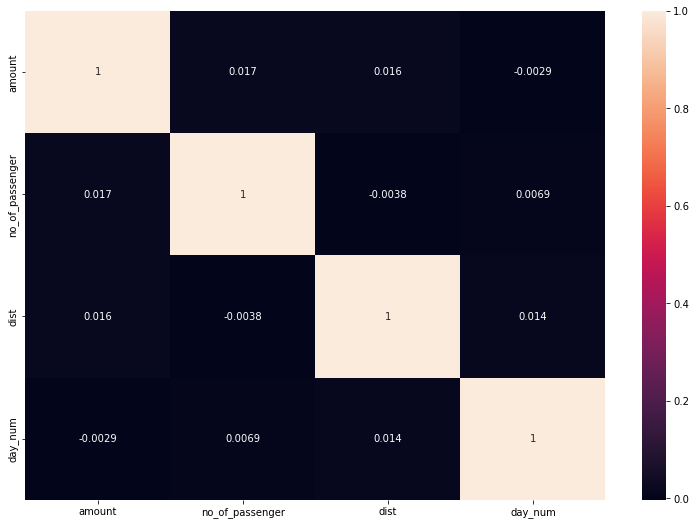

In [26]:
# Checking for correlation in the data
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

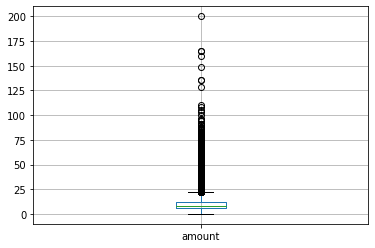

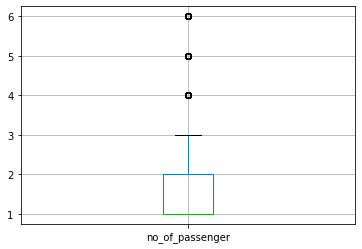

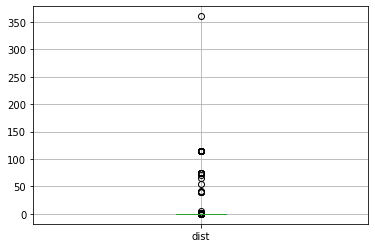

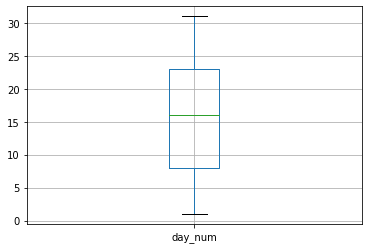

In [27]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

In [28]:
# Dealing with Outliers:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  amount
capping the  no_of_passenger
capping the  dist
capping the  Day
capping the  day_num
capping the  Session


C:\Users\roshs\AppData\Local\Temp/ipykernel_15172/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\roshs\AppData\Local\Temp/ipykernel_15172/1692076479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


In [29]:
# Label Encoding on Catagorical columns:
df_encoded=df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype=='object':
        df_encoded[col]=df_encoded[col].astype('category')
        df_encoded[col]=df_encoded[col].cat.codes
df=df_encoded
df_encoded.head()
# Encoding done.

,amount,no_of_passenger,dist,Day,day_num,Session
0,4.5,1,0.011742,1,15,1
1,16.9,1,0.107481,5,5,1
2,5.7,2,0.019212,4,18,2
3,7.7,1,0.029386,2,21,0
4,5.3,1,0.027194,5,9,0


<AxesSubplot:>

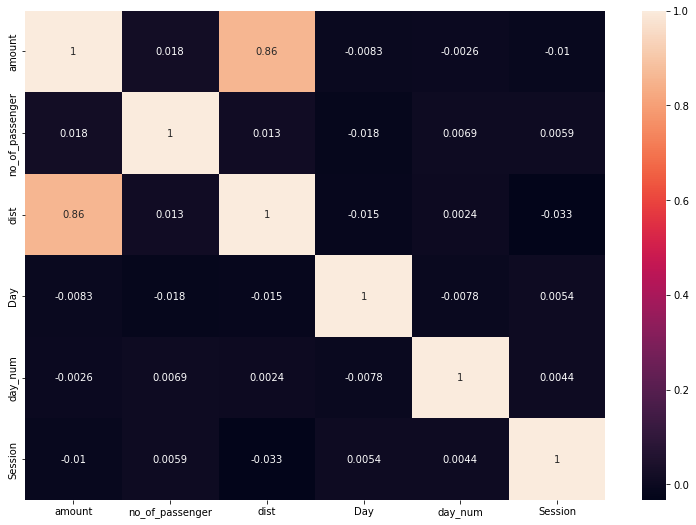

In [30]:
# Checking for data correlation visually
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

## The dataframe has a unique form of correlation

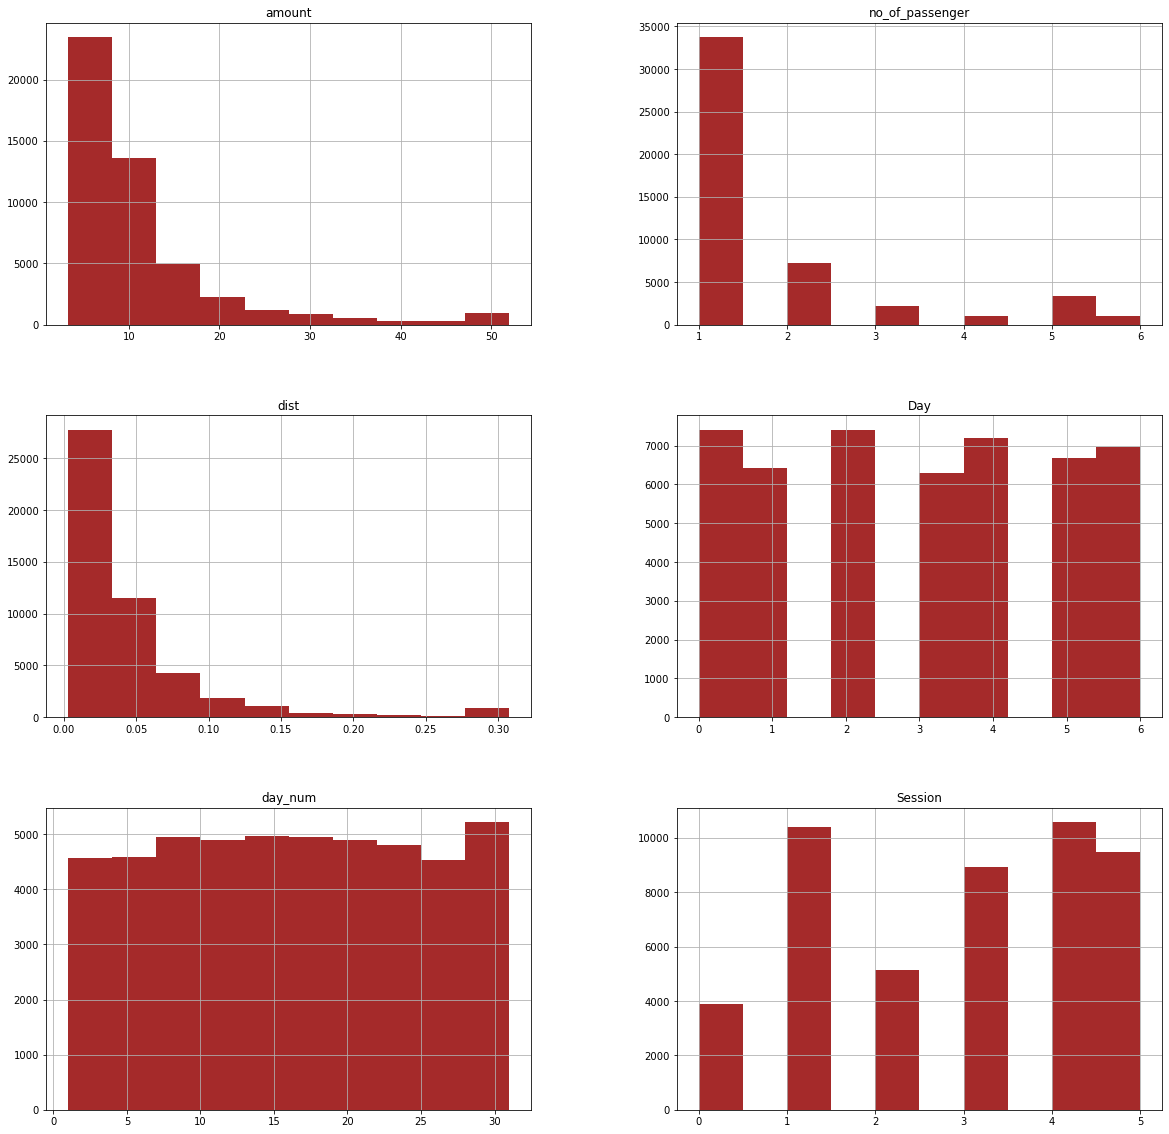

In [31]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

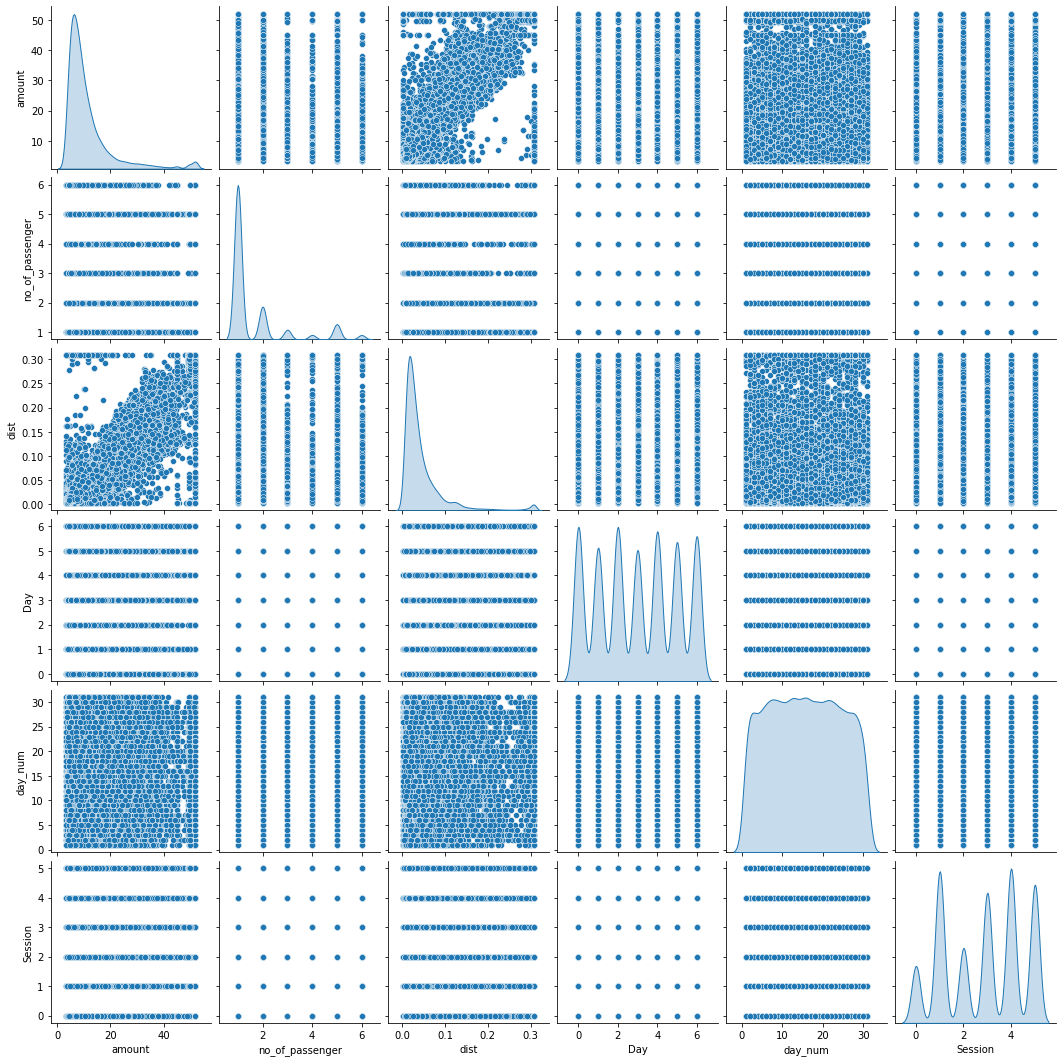

In [32]:
# Visualization of features to check the spread of data:
sns.pairplot(df,diag_kind='kde')

### 4. Data Splitting:

In [33]:
# Data splitting
x=df_encoded.drop(labels=['amount'],axis=1)
y=df["amount"]

### 5. Random Forest Model Build:

In [34]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 0)

### #6.1 Without Scaling:

In [35]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=0)

In [36]:
# Model Fitting
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [37]:
# Accuracy Testing
rftr=rf.score(x_train,y_train)
print('Train Score:',rftr)
rfte=rf.score(x_test,y_test)
print('Test Score: ',rfte)

Train Score: 0.9600254409917165
Test Score:  0.7262433730585846


## This is a underfitting model, we must proceed with other models with scaling for accuracy.

### #6.2 With Standard Scaling:

In [38]:
# Standard Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.52390131, -0.65386879, -0.98232699, -0.07800593, -1.12279592],
       [-0.52390131,  1.21987095,  1.00309223, -1.23278305, -1.12279592],
       [ 0.25112148, -0.50767094,  0.50673742,  0.2684272 , -0.51012232],
       ...,
       [-0.52390131, -0.68359021, -0.98232699,  0.73033805, -1.12279592],
       [-0.52390131, -0.4013399 ,  0.01038262,  1.65415974, -1.73546951],
       [ 0.25112148, -0.69759115,  1.00309223, -1.11730534, -1.73546951]])

In [39]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [40]:
# Model Fitting
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [41]:
# Accuracy Testing
rftrs=rf.score(x_train,y_train)
print('Train Score:',rftrs)
rftes=rf.score(x_test,y_test)
print('Test Score: ',rftes)

Train Score: 0.9598651992865125
Test Score:  0.7269148531650669


## This is a underfitting model, we must proceed with other models with scaling for accuracy.

### #6.3 With Min Max Scaling:

In [42]:
# Min Max Scaling
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 0.02869694, 0.16666667, 0.46666667, 0.2       ],
       [0.        , 0.34297293, 0.83333333, 0.13333333, 0.2       ],
       [0.2       , 0.05321821, 0.66666667, 0.56666667, 0.4       ],
       ...,
       [0.        , 0.02371187, 0.16666667, 0.7       , 0.2       ],
       [0.        , 0.07105275, 0.5       , 0.96666667, 0.        ],
       [0.2       , 0.02136354, 0.83333333, 0.16666667, 0.        ]])

In [43]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [44]:
# Model Fitting
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [45]:
# Accuracy Testing
rftrm=rf.score(x_train,y_train)
print('Train Score:',rftrm)
rftem=rf.score(x_test,y_test)
print('Test Score: ',rftem)

Train Score: 0.9601255051427365
Test Score:  0.7269783279457767


## This is a underfitting model, we must proceed with other models with scaling for accuracy.

### #6.4 With Robust Scaling:

In [46]:
# Robust Scaling
scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.4772137 , -0.5       , -0.06666667, -0.66666667],
       [ 0.        ,  2.24757907,  0.5       , -0.73333333, -0.66666667],
       [ 1.        , -0.26461276,  0.25      ,  0.13333333, -0.33333333],
       ...,
       [ 0.        , -0.52043459, -0.5       ,  0.4       , -0.66666667],
       [ 0.        , -0.10998613,  0.        ,  0.93333333, -1.        ],
       [ 1.        , -0.54079476,  0.5       , -0.66666667, -1.        ]])

In [47]:
# Train & Test Spliting
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [48]:
# Model Fitting
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [49]:
# Accuracy Testing
rftrr=rf.score(x_train,y_train)
print('Train Score:',rftrr)
rfter=rf.score(x_test,y_test)
print('Test Score: ',rfter)

Train Score: 0.9600067602365429
Test Score:  0.7260990389625096


## This is a underfitting model, we must proceed to conclusion part.

### 7. Conclusion:

In [50]:
print('Random Forest Model Without Scaling:')
print('Train Score:',rftr)
print('Test Score: ',rfte)
print('Random Forest Model With Standard Scaling:')
print('Train Score:',rftrs)
print('Test Score: ',rftes)
print('Random Forest Model With Min Max Scaling:')
print('Train Score:',rftrm)
print('Test Score: ',rftem)
print('Random Forest Model With Robust Scaling:')
print('Train Score:',rftrr)
print('Test Score: ',rfter)

Random Forest Model Without Scaling:
Train Score: 0.9600254409917165
Test Score:  0.7262433730585846
Random Forest Model With Standard Scaling:
Train Score: 0.9598651992865125
Test Score:  0.7269148531650669
Random Forest Model With Min Max Scaling:
Train Score: 0.9601255051427365
Test Score:  0.7269783279457767
Random Forest Model With Robust Scaling:
Train Score: 0.9600067602365429
Test Score:  0.7260990389625096


# Conclusion:
## All the models seems to be underfitting, with moreover the same scores, we can either go with the least underfitting model i.e. Random Forest Model With Min Max Scaling or to go with other Models.
## Due to this underfitting reasons Decision Tree is not widely used in the industry instead Ensemble Models.